In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint 

pd.set_option('display.max_columns', None)

In [22]:
full_data = pd.read_csv('IS453 Group Assignment - Data.csv')

#use a copy of hmeq_data for credit risk model
full_data = full_data.copy()

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   STATUS                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [23]:
full_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [11]:
working_set = full_data.copy()
working_set_orig = full_data.copy()

working_set.head()

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
working_set.describe(include = 'all')

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,0.502130,5.143927e-01,0.510853,0.11744,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.

# 1. Data Preparation 


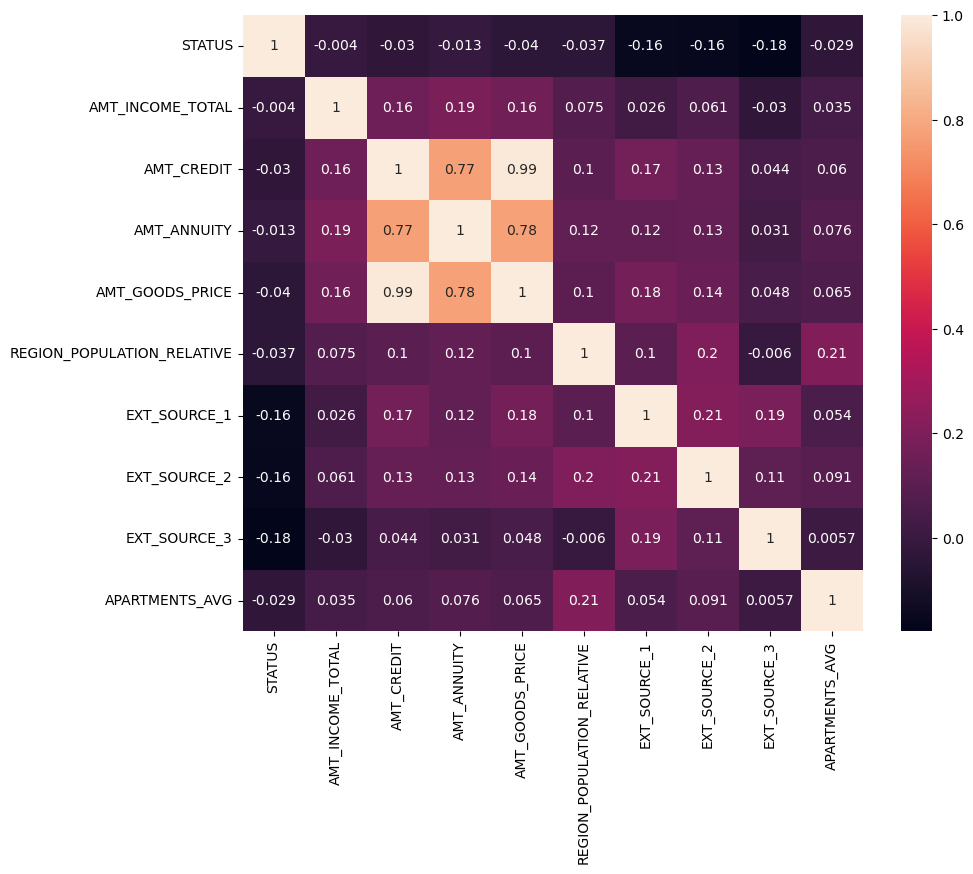

In [7]:
#Determine which variables are continuous variables 
cont_variables = working_set[["STATUS", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG"]]

#Check for highly correlated variables for CONTINUOUS VARIABLES ONLY 
cor = cont_variables.corr() 
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, ax=ax)
plt.show()


In [12]:
#Dropping Variables that result in biasedness and highly correlated ones
working_set = working_set.drop(columns=['CODE_GENDER', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis=1)

working_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   STATUS                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   NAME_TYPE_SUITE              306219 non-null  object 
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

In [13]:
# Inspect rows missing more than 4 values &  make sure not to reduce sample size too much 
rows_w_gt_3_na = working_set[working_set.isnull().sum(axis=1) > 3].shape[0]
print('Percent of total rows missing more than 3 values: ' + str("{:.1%}".format(rows_w_gt_3_na/working_set.shape[0])))
print(rows_w_gt_3_na)

Percent of total rows missing more than 3 values: 22.5%
69053


In [14]:
working_set.dropna(thresh=working_set.shape[1]-3,inplace=True)
print("Starting row count: " + str(working_set_orig.shape[0]))
print("Ending row count: " + str(working_set.shape[0]))
print("Percent dropped: " + "{:.2%}".format(1-working_set.shape[0]/working_set_orig.shape[0]))

Starting row count: 307511
Ending row count: 238458
Percent dropped: 22.46%


In [15]:
#Check % of missing column values again with revised dataset 
col_w_na = pd.DataFrame((working_set.isnull().sum().sort_values(ascending=False)/working_set.shape[0])).applymap("{0:.0%}".format)

col_w_na.head(10)

,0
OWN_CAR_AGE,62%
EXT_SOURCE_1,51%
APARTMENTS_AVG,45%
OCCUPATION_TYPE,25%
EXT_SOURCE_3,5%
NAME_TYPE_SUITE,0%
EXT_SOURCE_2,0%
OBS_60_CNT_SOCIAL_CIRCLE,0%
DEF_60_CNT_SOCIAL_CIRCLE,0%
DAYS_LAST_PHONE_CHANGE,0%


In [21]:
#Remove 3 variables as the amount of missing data is more than 50% 
working_set = working_set.drop(columns=['OWN_CAR_AGE', 'EXT_SOURCE_1'], axis=1)

working_set.info()

KeyError: "['OWN_CAR_AGE' 'EXT_SOURCE_1'] not found in axis"

In [20]:
working_set['FLAG_DOCUMENT_2'].head()

KeyError: 'FLAG_DOCUMENT_2'

In [19]:
#Feature Extraction -- Combinding the Flag Documents columns 
working_set['TOTAL_FLAG_DOCUMENTS'] = working_set['FLAG_DOCUMENT_2'] + working_set['FLAG_DOCUMENT_3'] + working_set['FLAG_DOCUMENT_4'] + working_set['FLAG_DOCUMENT_5'] + working_set['FLAG_DOCUMENT_6'] + working_set['FLAG_DOCUMENT_7'] + working_set['FLAG_DOCUMENT_8'] + working_set['FLAG_DOCUMENT_9'] + working_set['FLAG_DOCUMENT_10'] + working_set['FLAG_DOCUMENT_11'] + working_set['FLAG_DOCUMENT_12'] + working_set['FLAG_DOCUMENT_13'] + working_set['FLAG_DOCUMENT_14'] + working_set['FLAG_DOCUMENT_15'] + working_set['FLAG_DOCUMENT_16'] + working_set['FLAG_DOCUMENT_17'] + working_set['FLAG_DOCUMENT_18'] + working_set['FLAG_DOCUMENT_19'] + working_set['FLAG_DOCUMENT_20'] + working_set['FLAG_DOCUMENT_21']

working_set['TOTAL_FLAG_DOCUMENTS'].head()

working_set.drop('FLAG_DOCUMENT_2', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_3', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_4', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_5', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_6', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_7', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_8', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_9', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_10', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_11', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_12', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_13', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_14', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_15', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_16', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_17', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_18', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_19', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_20', inplace=True, axis=1)
working_set.drop('FLAG_DOCUMENT_21', inplace=True, axis=1)

working_set.head(3)

KeyError: 'FLAG_DOCUMENT_2'

In [ ]:
#Change all null values to 'Missing' /
#working_set = working_set.fillna('Missing')
#Check % of missing column values again with revised dataset 
#col_w_na = pd.DataFrame((working_set.isnull().sum().sort_values(ascending=False)/working_set.shape[0])).applymap("{0:.0%}".format)

#col_w_na.head(10)

In [17]:
#Generate WOE Bins 

#Remove missing values 
working_set.dropna(inplace=True)
working_set.isna().sum()
# automatically calculate bin ranges 
bins = sc.woebin(working_set, y='STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ORGANIZATION_TYPE
>>> Continue the binning process?
1: yes 
2: no


ValueError: invalid literal for int() with base 10: 'yes'

In [19]:
#IV Values Categorisation 
#IV < 0.02 : Not useful for prediction 

iv_zero = ['FLAG_DOCUMENT_20', 'AMT_REQ_CREDIT_BUREAU_HOUR','FLAG_DOCUMENT_14','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_6', 'REG_REGION_NOT_LIVE_REGION', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_13', 'FLAG_CONT_MOBILE', 'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_15', 'FLAG_EMP_PHONE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DOCUMENT_4',  'AMT_REQ_CREDIT_BUREAU_DAY', '']
not_useful = ['CNT_FAM_MEMBERS', 'FLAG_WORK_PHONE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_EDUCATION_TYPE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_DOCUMENT_8', 'NAME_FAMILY_STATUS',  'CNT_CHILDREN',  'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', '' ]
# 0.02 <= IV < 0.1 : Weak Predictive Power
weak = ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE' ] 
# 0.1 <= IV < 0.5 : Medium Predictive Power 
medium = ['EXT_SOURCE_2'] 
# 0.3 <= IV < 0.5 : Strong predictive Power 
strong = ['EXT_SOURCE_3'] 

In [26]:
#Narrow down the columns 

scorecard_data = working_set[['STATUS', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']]

scorecard_data.head(10)
scorecard_data['STATUS'].value_counts()


0    49200
1     5386
Name: STATUS, dtype: int64

In [27]:
#Train-test split 
train, test = sc.split_df(scorecard_data, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(38210, 12)
(16376, 12)


In [28]:
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,REGION_RATING_CLIENT_W_CITY_woe,DAYS_BIRTH_woe,REGION_POPULATION_RELATIVE_woe,REGION_RATING_CLIENT_woe,NAME_EDUCATION_TYPE_woe,DAYS_EMPLOYED_woe,EXT_SOURCE_3_woe,DAYS_REGISTRATION_woe,DAYS_LAST_PHONE_CHANGE_woe,EXT_SOURCE_2_woe,AMT_CREDIT_woe
21,0,-0.031953,-0.056819,0.091930,-0.036718,0.060832,0.153973,-0.339708,0.045947,0.146017,0.368722,-0.199783
24,0,-0.031953,0.079308,0.091930,-0.036718,0.060832,0.153973,-0.339708,0.183250,0.146017,-0.839462,-0.142320
35,0,-0.031953,0.079308,0.050181,-0.036718,-0.322110,0.153973,-0.670221,-0.142777,-0.176507,-0.427111,0.254639
37,0,-0.031953,-0.306373,-0.136378,-0.036718,0.060832,0.153973,-0.670221,0.045947,-0.176507,-0.839462,0.254639
42,1,0.381351,0.079308,0.050181,0.360855,0.060832,-0.261991,0.388196,0.183250,-0.176507,-0.427111,0.063714
...,...,...,...,...,...,...,...,...,...,...,...,...
307478,0,-0.031953,-0.306373,0.091930,-0.036718,-0.322110,0.153973,-0.035103,0.183250,0.146017,-0.089776,-0.199783
307479,0,-0.031953,0.079308,0.050181,-0.036718,0.060832,0.153973,0.388196,0.183250,0.146017,0.368722,0.254639
307492,0,-0.031953,-0.306373,0.091930,-0.036718,0.060832,0.153973,0.388196,-0.106445,0.146017,-0.089776,-0.635631
307494,0,-0.031953,-0.056819,-0.136378,-0.036718,0.060832,-0.550569,-0.339708,0.183250,0.146017,-0.427111,0.254639


In [31]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("beta coefficients:")
print(lr.coef_)
print("alpha")
print(lr.intercept_)

beta coefficients:
[[0.45803333 0.07039504 0.05458335 0.07185404 0.88409194 0.49369962
  0.8918121  0.39020113 0.18525437 0.78031757 0.67014197]]
alpha
[-2.21331767]


In [32]:
# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                   bin  points
83  AMT_CREDIT       [-inf,250000.0)    55.0
84  AMT_CREDIT   [250000.0,350000.0)    51.0
85  AMT_CREDIT   [350000.0,650000.0)    48.0
86  AMT_CREDIT   [650000.0,850000.0)    54.0
87  AMT_CREDIT  [850000.0,1300000.0)    56.0
88  AMT_CREDIT       [1300000.0,inf)    65.0,
 'DAYS_BIRTH':       variable                  bin  points
90  DAYS_BIRTH      [-inf,-18000.0)    53.0
91  DAYS_BIRTH  [-18000.0,-15500.0)    53.0
92  DAYS_BIRTH  [-15500.0,-14000.0)    53.0
93  DAYS_BIRTH  [-14000.0,-11000.0)    52.0
94  DAYS_BIRTH       [-11000.0,inf)    52.0,
 'DAYS_EMPLOYED':           variable                bin  points
135  DAYS_EMPLOYED     [-inf,-4200.0)    60.0
136  DAYS_EMPLOYED  [-4200.0,-2000.0)    56.0
137  DAYS_EMPLOYED      [-2000.0,inf)    50.0,
 'DAYS_LAST_PHONE_CHANGE':                    variable                bin  points
142  DAYS_LAST_PHONE_CHANGE     [-inf,-2000.0)    55.0
143  DAYS_LAST_PHONE_CHANGE  [-2000.0,-1200.0)   

Text(0.5, 1.0, 'test data scores')

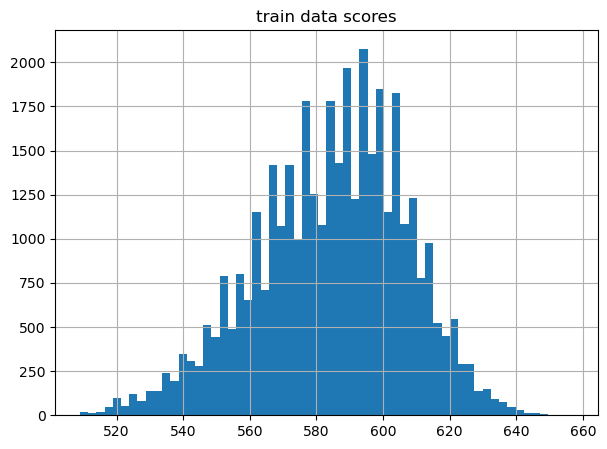

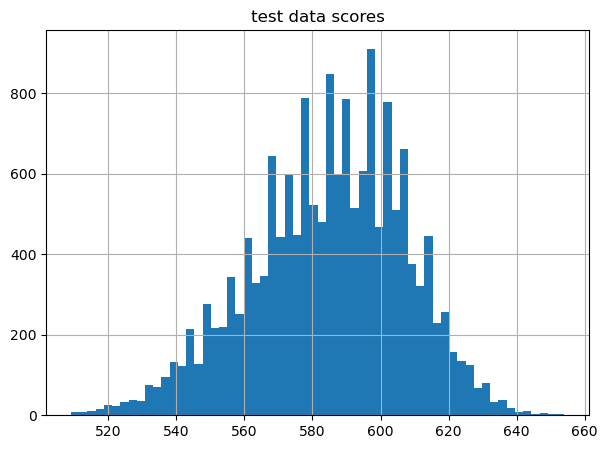

In [33]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

In [34]:
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))


Confusion matrix:
[[14757  1609]
 [    3     7]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     16366
           1       0.00      0.70      0.01        10

    accuracy                           0.90     16376
   macro avg       0.50      0.80      0.48     16376
weighted avg       1.00      0.90      0.95     16376



In [40]:
# calulate credit score for new application
col = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']
val = [[0.079059696,0.61602712,0.015221,2,-6193, 'Secondary / secondary special', 284400, -13715,2,-151, -1364]]
new_appl = pd.DataFrame(val, columns=col)

new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
new_appl_score.index = new_appl_score.index.str.replace('_points', '')

summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
summary.columns = ['App Value','Points']
print(summary)


                                                 App Value  Points
EXT_SOURCE_3                                       0.07906    25.0
EXT_SOURCE_2                                      0.616027    62.0
REGION_POPULATION_RELATIVE                        0.015221    52.0
REGION_RATING_CLIENT_W_CITY                              2    53.0
DAYS_REGISTRATION                                    -6193    54.0
NAME_EDUCATION_TYPE          Secondary / secondary special    51.0
AMT_CREDIT                                          284400    51.0
DAYS_BIRTH                                          -13715    52.0
REGION_RATING_CLIENT                                     2    53.0
DAYS_EMPLOYED                                         -151    50.0
DAYS_LAST_PHONE_CHANGE                               -1364    53.0
score                                                  NaN   556.0
